In [ ]:
# in spectral clustering we construct a similarity garaph(KNN) 
# and embed the data points in a low dimensional space ( spectral embedding) in which 
# the clusters are more obvious with the use of eigenvalues and eigenvectors 

In [ ]:
import warnings
warnings.filterwarnings("ignore") 
from IPython.core.display import display, HTML

import time

import pandas as pd
#import pandas_datareader.data as web
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#%watermark

In [ ]:
from sklearn.datasets import make_moons
random_state = 21
X_mn, y_mn = make_moons(150, noise=.07, random_state=random_state)
cmap = 'viridis'
dot_size=50

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data with ground truth labels ', fontsize=18, fontweight='demi')

ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_mn,s=dot_size, cmap=cmap)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_mn)
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data after trying to cluster using Kmeans', fontsize=18, fontweight='demi')

ax.scatter(X_mn[:, 0], X_mn[:, 1],c=kmeans.labels_,s=dot_size, cmap=cmap)

In [ ]:
from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph

In [ ]:
A = radius_neighbors_graph(X_mn,0.4,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
# A = kneighbors_graph(X_mn, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
A = A.toarray()
A.shape

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('5 first datapoints', fontsize=18, fontweight='demi')
ax.set_xlim(-1, 2)
ax.set_ylim(-1,1)
ax.scatter(X_mn[:5, 0], X_mn[:5, 1],s=dot_size, cmap=cmap)
for i in range(5):
    ax.annotate(i, (X_mn[i,0],X_mn[i,1]))

In [ ]:
from scipy.sparse import csgraph
from sklearn.cluster import KMeans
L = csgraph.laplacian(A, normed=False)

In [ ]:
B = np.sum(A,axis=0)
B[:2]

In [ ]:
eigval, eigvec = np.linalg.eig(L)
kmeans = KMeans(n_clusters=2, random_state=0).fit(eigvec)
# kmeans

In [ ]:
np.where(eigval == np.partition(eigval, 1)[1]) 

In [ ]:
y_spec =eigvec[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Data after spectral clustering from scratch', fontsize=18, fontweight='demi')
ax.scatter(X_mn[:, 0], X_mn[:, 1],c=y_spec ,s=dot_size, cmap=cmap)

In [ ]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

labelsS = model.fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Built in sklearn spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

In [ ]:
model

In [ ]:
SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
          coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=1,
          n_neighbors=10, random_state=None)

In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)

# Get your mentioned graph
G = nx.karate_club_graph()

# Get ground-truth: club-labels -> transform to 0/1 np-array
#     (possible overcomplicated networkx usage here)
gt_dict = nx.get_node_attributes(G, 'club')
gt = [gt_dict[i] for i in G.nodes()]
gt = np.array([0 if i == 'Mr. Hi' else 1 for i in gt])

# Get adjacency-matrix as numpy-array
adj_mat = nx.to_numpy_matrix(G)

print('ground truth')
print(gt)



In [ ]:
# Cluster
sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc_labels = sc.fit_predict(np.array(adj_mat))

print(sc_labels)


In [ ]:

# calculate cross entropy
def cross_entropy(p, q):
    from math import log2
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

In [ ]:
# Calculate some clustering metrics
score = metrics.adjusted_rand_score(gt, sc_labels)
print('score compared with the ground truth')
print(score)

In [ ]:
def change_form(new): 
    gtt = [] 
    for x in gt: 
        if x == 1: 
            gtt.append(x) 
        else: 
            gtt.append(-1)
    return gtt 
gtt = change_form(gt) 
scc = change_form(sc_labels) 

In [ ]:
labelsS = model.fit_predict(X_mn)

fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Built in sklearn spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(X_mn[:, 0], X_mn[:, 1], c=labelsS, s=dot_size, cmap=cmap)

In [ ]:
import pandas as pd
import numpy as np
import logging
from source_code.spectral_equal_size_clustering import SpectralEqualSizeClustering
from source_code.visualisation import visualise_clusters

In [ ]:
dist_tr = np.load("datasets/symmetric_dist_tr.npy")


In [ ]:
dist_tr

In [6]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm
from nxviz import CircosPlot

In [7]:
protein_list = ['TPH1','COMT','SLC18A2','HTR1B','HTR2C','HTR2A','MAOA',
            'TPH2','HTR1A','HTR7','SLC6A4','GABBR2','POMC','GNAI3',
            'NPY','ADCY1','PDYN','GRM2','GRM3','GABBR1']
proteins = '%0d'.join(protein_list)
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

In [9]:
lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']]  

In [10]:
G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions) # convert to array for clarity
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = int(float(interaction[2])*100) # score as weighted edge
    
    # To include all the weighted connections, uncomment the following line
    # G.add_weighted_edges_from([(a,b,w)])
    
    # To only keep high scoring edges, use the following lines
    if w > 80: # only keep high scoring edges
        G.add_weighted_edges_from([(a,b,w)])

TypeError: draw() takes 0 positional arguments but 1 was given

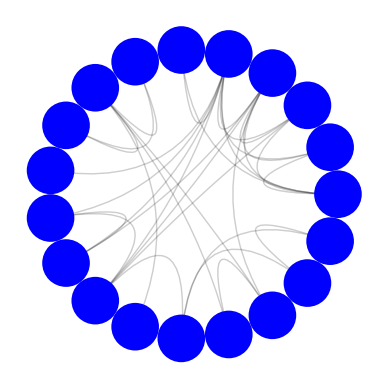

In [12]:
c = CircosPlot(G)
c.draw()
plt.show()

In [18]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax,rnd=False):
    arr = list(l)
    return [round((x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin,2) for x in arr]

nodelist = [n for n in G.nodes]
# ws = rescale([float(G[u][v]['weight']) for u,v in G.edges],1,10)
# alternative method below
ws = rescale([float(G[u][v]['weight'])**70 for u,v in G.edges],1,50)
edgelist = [(str(u),str(v),{"weight":ws.pop(0)}) for u,v in G.edges]

# create new graph using nodelist and edgelist
g = nx.Graph(name='Protein Interaction Graph')
g.add_nodes_from(nodelist)
g.add_edges_from(edgelist)
# go through nodes in graph G and store their degree as "class" in graph g
for v in G:
    g.nodes[v]["class"] = G.degree(v)

TypeError: draw() takes 0 positional arguments but 1 was given

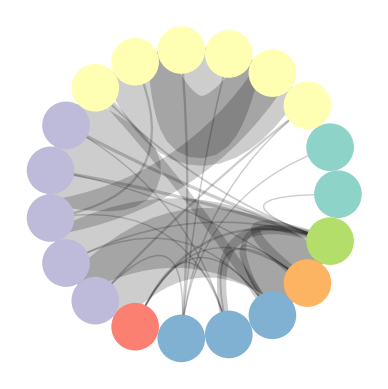

In [20]:
c = CircosPlot(G=g, node_grouping="class", node_color="class", edge_width="weight")
c.draw()


In [3]:
from pycirclize import Circos
import pandas as pd

# Create matrix dataframe (3 x 6)
row_names = ["F1", "F2", "F3"]
col_names = ["T1", "T2", "T3", "T4", "T5", "T6"]
matrix_data = [
    [10, 16, 7, 7, 10, 8],
    [4, 9, 10, 12, 12, 7],
    [17, 13, 7, 4, 20, 4],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

# Initialize Circos from matrix for plotting Chord Diagram
circos = Circos.initialize_from_matrix(
    matrix_df,
    space=5,
    cmap="tab10",
    label_kws=dict(size=12),
    link_kws=dict(ec="black", lw=0.5, direction=1),
)
circos.savefig("example03.png")



In [8]:
circos

In [9]:
from pycirclize import Circos
import numpy as np
np.random.seed(0)

# Initialize Circos sectors
sectors = {"A": 10, "B": 15, "C": 12, "D": 20, "E": 15}
circos = Circos(sectors, space=5)

for sector in circos.sectors:
    # Plot sector name
    sector.text(f"Sector: {sector.name}", r=110, size=15)
    # Create x positions & random y values
    x = np.arange(sector.start, sector.end) + 0.5
    y = np.random.randint(0, 100, len(x))
    # Plot lines
    track1 = sector.add_track((80, 100), r_pad_ratio=0.1)
    track1.xticks_by_interval(interval=1)
    track1.axis()
    track1.line(x, y)
    # Plot points 
    track2 = sector.add_track((55, 75), r_pad_ratio=0.1)
    track2.axis()
    track2.scatter(x, y)
    # Plot bars
    track3 = sector.add_track((30, 50), r_pad_ratio=0.1)
    track3.axis()
    track3.bar(x, y)

# Plot links 
circos.link(("A", 0, 3), ("B", 15, 12))
circos.link(("B", 0, 3), ("C", 7, 11), color="skyblue")
circos.link(("C", 2, 5), ("E", 15, 12), color="chocolate", direction=1)
circos.link(("D", 3, 5), ("D", 18, 15), color="lime", ec="black", lw=0.5, hatch="//", direction=2)
circos.link(("D", 8, 10), ("E", 2, 8), color="violet", ec="red", lw=1.0, ls="dashed")

circos.savefig("example01.png")